In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("results/exp_5/result_0.csv")


In [3]:
data = data.sort_values(["result_size"])
data

,wl,cache_size,cache_type,model,storage_cost,compute_cost,total_cost,result_size,x_label
6,wl4,8,s3,hybrid,0.022501,0.079322,0.101822,1.606375e+07,10MB
7,wl4,8,gp3,hybrid,0.020534,0.058475,0.079009,1.606375e+07,10MB
0,wl1,8,s3,hybrid,0.009345,0.114112,0.123457,1.111010e+09,100MB
1,wl1,8,gp3,hybrid,0.019712,0.087839,0.107551,1.111010e+09,100MB
2,wl2,64,s3,hybrid,0.048534,0.107193,0.155727,4.710536e+10,1GB
3,wl2,64,gp3,hybrid,0.165417,0.135881,0.301298,4.711545e+10,1GB
5,wl3,256,gp3,hybrid,0.561025,0.183365,0.744390,4.706554e+11,>1GB
4,wl3,256,s3,hybrid,0.160883,0.127118,0.288002,4.706554e+11,>1GB


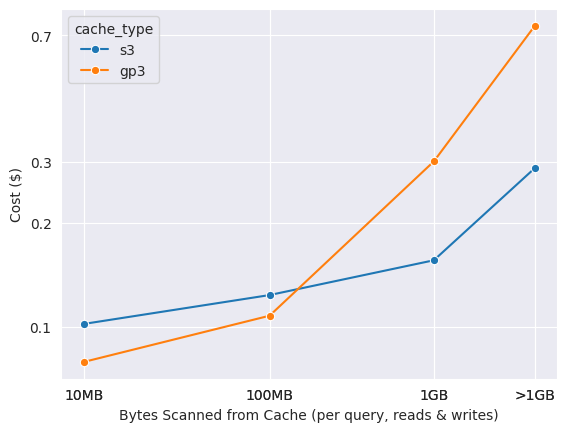

In [7]:
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.lineplot(data=data, x="result_size", y="total_cost", hue="cache_type", marker="o")

plt.xscale("log")
plt.yscale("log")

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

xticks = list(data["result_size"])
yticks = list(data["total_cost"])
xlabels = list(data["x_label"])
plt.xticks(xticks, xlabels)
plt.yticks([0.1, 0.2, 0.3, 0.7])

plt.xlabel("Bytes Scanned from Cache (per query, reads & writes)")
plt.ylabel("Cost ($)")
plt.show()


In [3]:
plan_wl1_gp3 = pd.read_csv("results/exp_5/plan_wl1_gp3.csv")
plan_wl1_gp3["cache_type"] = "gp3"
plan_wl1_s3 = pd.read_csv("results/exp_5/plan_wl1_s3.csv")
plan_wl1_s3["cache_type"] = "s3"
plan_wl2_gp3 = pd.read_csv("results/exp_5/plan_wl2_gp3.csv")
plan_wl2_gp3["cache_type"] = "gp3"
plan_wl2_s3 = pd.read_csv("results/exp_5/plan_wl2_s3.csv")
plan_wl2_s3["cache_type"] = "s3"
plan_wl3_gp3 = pd.read_csv("results/exp_5/plan_wl3_gp3.csv")
plan_wl3_gp3["cache_type"] = "gp3"
plan_wl3_s3 = pd.read_csv("results/exp_5/plan_wl3_s3.csv")
plan_wl3_s3["cache_type"] = "s3"
plan_wl4_gp3 = pd.read_csv("results/exp_5/plan_wl4_gp3.csv")
plan_wl4_gp3["cache_type"] = "gp3"
plan_wl4_s3 = pd.read_csv("results/exp_5/plan_wl4_s3.csv")
plan_wl4_s3["cache_type"] = "s3"

data = pd.concat([
    plan_wl1_s3,
    plan_wl1_gp3,
    plan_wl2_s3,
    plan_wl2_gp3,
    plan_wl3_gp3,
    plan_wl3_s3,
    plan_wl4_gp3,
    plan_wl4_s3,
])
data = data.dropna(subset=["latency"])
data

,Unnamed: 0,query_hash,query_type,bytes_scanned,result_size,write_volume,cpu_time,unique_db_instance,num_read_tables,intermediate_result_size,...,was_cached,cache_writes,cache_reads,execution_trigger,triggered_by,threshold,network_speed,runtime,latency,cache_type
0,0,4aa4db9e047aeee70ad32360d3cd3658,select,1685294311,473439284.0,0,0.006947,0,1,9.468786e+09,...,False,0.0,1,immediate,4aa4db9e047aeee70ad32360d3cd3658,1192.965565,1.717987e+10,0.300104,0.300104,s3
2,2,226c5b151bb91c26a15693e19f761a53,select,2058523242,329804522.0,0,0.006761,0,1,6.596090e+09,...,False,1.0,1,immediate,226c5b151bb91c26a15693e19f761a53,1192.965565,1.717987e+10,0.841220,0.841220,s3
5,5,d5dc4df5020a8ef1ca90dc005051f227,select,3992497705,220918964.0,0,0.013112,0,1,4.418379e+09,...,False,0.0,1,immediate,d5dc4df5020a8ef1ca90dc005051f227,1192.965565,1.717987e+10,0.352991,0.352991,s3
6,6,ccf839969a672d09388bdd4a6d10c8d7,select,3516654456,702442182.0,0,0.012138,0,2,2.107327e+10,...,False,0.0,1,immediate,ccf839969a672d09388bdd4a6d10c8d7,1192.965565,1.717987e+10,0.392792,0.392792,s3
8,8,07b3d67d5f8f74e812590ee4c848d9c9,select,1541666657,158679744.0,0,0.006915,0,1,3.173595e+09,...,False,0.0,1,immediate,07b3d67d5f8f74e812590ee4c848d9c9,1192.965565,1.717987e+10,0.286875,0.286875,s3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9399,9399,6b5ad54cae1f7270621d71812dfe02d4,select,225732642,21929814.0,0,0.004095,0,1,4.385963e+08,...,False,0.0,1,immediate,6b5ad54cae1f7270621d71812dfe02d4,658.590130,1.717987e+10,0.116979,0.116979,s3
9400,9400,97f43d2bfe457ce1a08432f3f0d12131,select,1974724324,14673741.0,0,0.006506,0,1,2.934750e+08,...,False,0.0,1,immediate,97f43d2bfe457ce1a08432f3f0d12131,658.590130,1.717987e+10,0.230702,0.230702,s3
9401,9401,7d08129d39eff76752b32ddc3117f8ab,select,225368287,24507069.0,0,0.004680,0,1,4.901415e+08,...,False,0.0,1,immediate,7d08129d39eff76752b32ddc3117f8ab,658.590130,1.717987e+10,0.164480,0.164480,s3
9402,9402,eed205b86ac55c1f5fa870c4fb26636e,select,1884081910,2850055.0,0,0.023970,0,1,5.700110e+07,...,False,1.0,1,immediate,eed205b86ac55c1f5fa870c4fb26636e,658.590130,1.717987e+10,0.380656,0.817517,s3


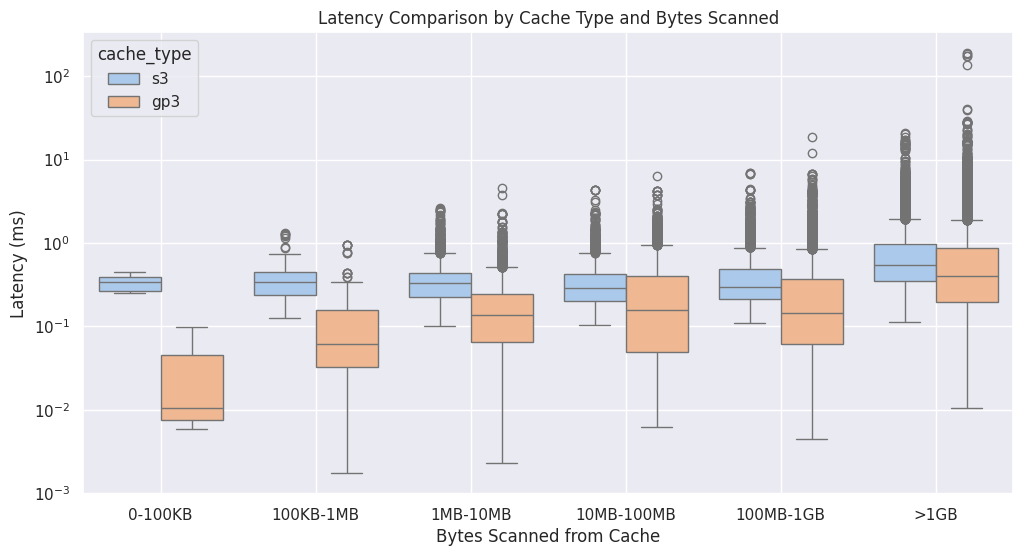

In [24]:
sns.set_theme(palette="pastel")
bins = [0, 1e5, 1e6, 1e7, 1e8, 1e9, 1e15]  # up to 100 KB, 1 MB, 10 MB, 100 MB
labels = ['0-100KB', '100KB-1MB', '1MB-10MB', '10MB-100MB', '100MB-1GB', '>1GB']

data['size_range'] = pd.cut(data['result_size'], bins=bins, labels=labels)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='size_range', y='latency', hue='cache_type')


plt.xlabel("Bytes Scanned from Cache")
plt.ylabel("Latency (ms)")
plt.title("Latency Comparison by Cache Type and Bytes Scanned")
plt.grid(True)
plt.yscale("log")
plt.show()